In [54]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression

import statsmodels.api as sm

%matplotlib inline

In [43]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Simple linear regression 

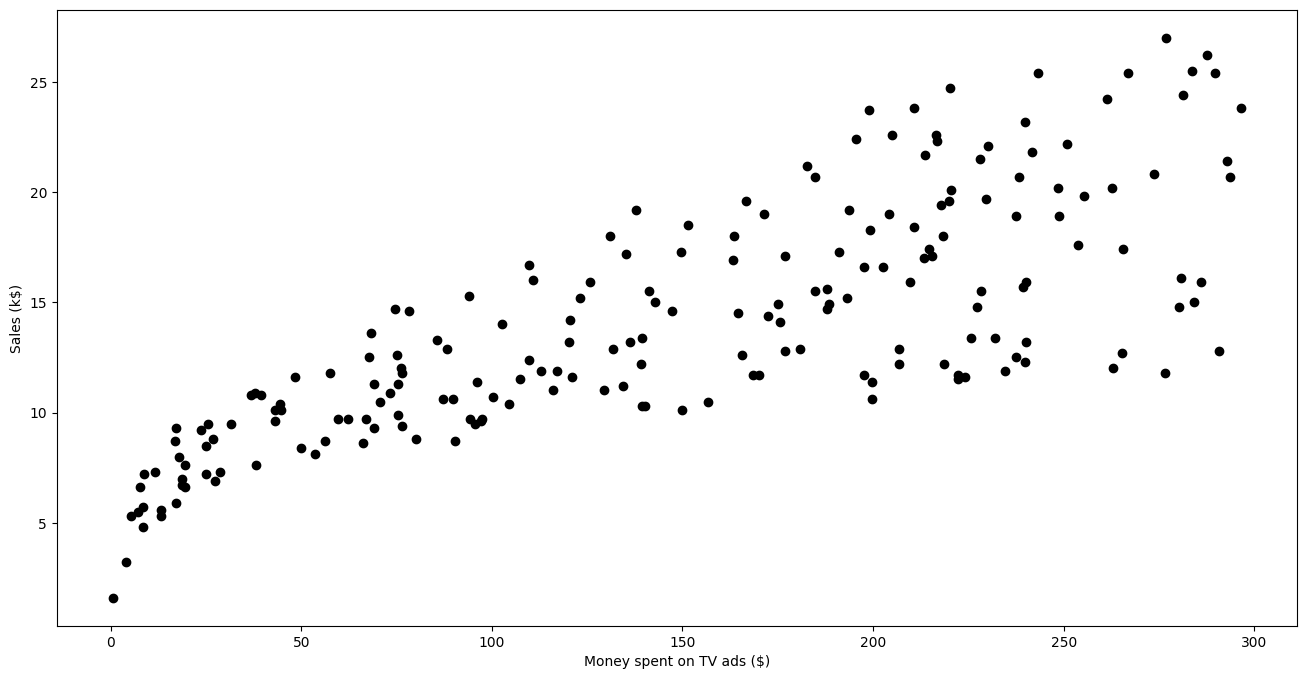

In [35]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

we always reshape data to make it accessible for algorithsm and model to work with, basically converting it to different dimensions for requirements, Since Linear algebra uses matrix algebra for calculations, its important to conver ti tt o 2d arrays

In [36]:
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(X, y)

print(f"The linear model is: Y = A + B * TV\n\t\t     Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear model is: Y = A + B * TV
		     Y = 7.032593549127695 + 0.04753664043301975*TV


### Components of the Linear Equation

- `Y`: This represents the predicted sales.
- `reg.intercept_`: This is the y-intercept of the linear model. It represents the predicted sales when TV advertising spending is zero.
- `reg.coef_`: This is the coefficient (slope) for the TV advertising feature. It represents how much the sales are expected to increase for each unit increase in TV advertising spending.
- `TV`: This represents the amount spent on TV advertising.

The resulting equation will look something like:

Y = a + b * TV

Where:
- Y is the predicted sales
- a is the intercept
- b is the coefficient for TV advertising
- TV is the amount spent on TV advertising

This equation allows you to predict sales for any given amount of TV advertising spending. For example, if the equation is Y = 7 + 0.05*TV, it means:
- When no money is spent on TV ads (TV = 0), the predicted sales are 7 thousand dollars.
- For every dollar spent on TV advertising, sales are expected to increase by 0.05 thousand dollars (or $50).

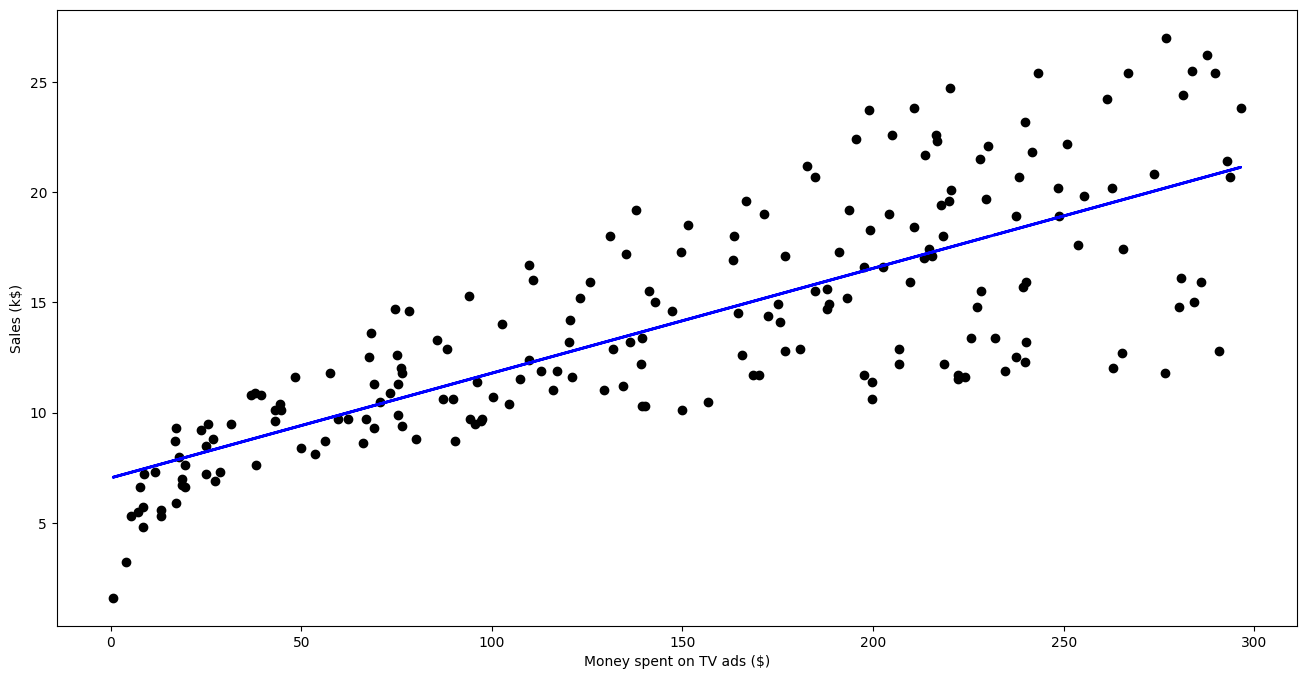

In [37]:
predictions = reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, y, c='black')
plt.plot(X, predictions, c='blue', linewidth=2)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

In [38]:
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.47e-42
Time:                        17:31:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

## Multiple linear regression 

In [39]:
Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f"The linear model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The linear model is: 
 Y = 2.9388893694594085 + 0.0457646454553976*TV + 0.18853001691820456*radio + -0.001037493042476309*newspaper


In [40]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 19 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        17:31:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Simple Linear Regression:
Equation: Sales = 7.03 + 0.05 * TV
Predicted sales for TV=250: 18.92


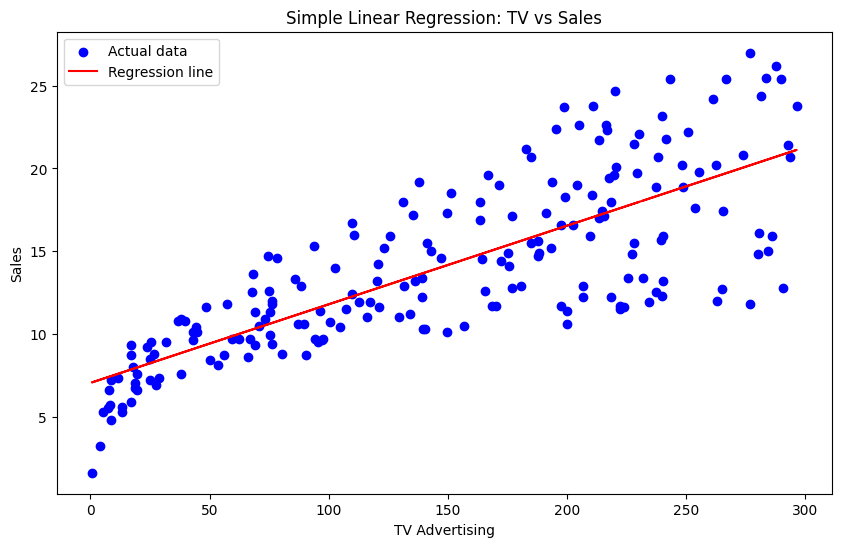


Multiple Linear Regression:
Equation: Sales = 2.92 + 0.05 * TV + 0.19 * Radio
Predicted sales for TV=250 and Radio=50: 23.76


/mnt/c/Users/Som/Desktop/Data-Science-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:


# Simple Linear Regression (TV vs Sales)
X_simple = data['TV'].values.reshape(-1, 1)
y = data['sales'].values

# Fit the model
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Print simple regression results
print("Simple Linear Regression:")
print(f"Equation: Sales = {model_simple.intercept_:.2f} + {model_simple.coef_[0]:.2f} * TV")

# Predict sales for TV = 250
tv_test = np.array([[250]])
prediction_simple = model_simple.predict(tv_test)
print(f"Predicted sales for TV=250: {prediction_simple[0]:.2f}")

# Plot simple regression
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], data['sales'], color='blue', label='Actual data')
plt.plot(X_simple, model_simple.predict(X_simple), color='red', label='Regression line')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('Simple Linear Regression: TV vs Sales')
plt.legend()
plt.show()

# Multiple Linear Regression (TV and Radio vs Sales)
X_multiple = data[['TV', 'radio']]
y = data['sales']

# Fit the model
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Print multiple regression results
print("\nMultiple Linear Regression:")
print(f"Equation: Sales = {model_multiple.intercept_:.2f} + {model_multiple.coef_[0]:.2f} * TV + {model_multiple.coef_[1]:.2f} * Radio")

# Predict sales for TV = 250 and Radio = 50
test_values = np.array([[250, 50]])
prediction_multiple = model_multiple.predict(test_values)
print(f"Predicted sales for TV=250 and Radio=50: {prediction_multiple[0]:.2f}")


# Logistic Regression

### Bayes' Theorem and Logistic Regression

#### **Bayes' Theorem Overview**
Bayes' theorem is a fundamental concept in probability theory that helps us update the probability of a hypothesis (e.g., a class label) given new evidence (e.g., feature values). It is expressed as:

$$
P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}
$$

Where:
- $$P(H|E)$$: Posterior probability (probability of hypothesis $$H$$ given evidence $$E$$).
- $$P(E|H)$$: Likelihood (probability of evidence $$E$$ given hypothesis $$H$$).
- $$P(H)$$: Prior probability (initial belief about $$H$$).
- $$P(E)$$: Marginal probability of evidence.

In classification, Bayes' theorem helps us estimate the probability of a data point belonging to a specific class.

#### **Logistic Regression and Bayes' Theorem**
Logistic regression can be derived from Bayes' theorem. It models the conditional probability $$P(Y|X)$$, where $$Y$$ is the target variable (binary: 0 or 1), and $$X$$ is the feature vector. Logistic regression assumes:

1. The log-odds (logarithm of odds) is a linear function of the input features:
   $$
   \text{log-odds} = \ln\left(\frac{P(Y=1|X)}{1 - P(Y=1|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_p X_p
   $$

2. Using the inverse logit function, we can transform log-odds into probabilities:
   $$
   P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \dots + \beta_p X_p)}}
   $$

Logistic regression directly estimates the coefficients ($$\beta_0, \beta_1, ...$$) to maximize the likelihood of observing the data.

---

### Linear Discriminant Analysis (LDA)

#### **What is LDA?**
Linear Discriminant Analysis (LDA) is a classification technique based on Bayes' theorem. Unlike logistic regression, which models $$P(Y|X)$$, LDA models the distribution of features ($$X$$) for each class ($$Y=k$$) and uses Bayes' theorem to calculate posterior probabilities.

#### **Steps in LDA**:
1. **Assume Normal Distribution**: LDA assumes that features for each class are normally distributed.
2. **Estimate Parameters**:
   - Mean ($$\mu_k$$) and variance ($$\sigma^2_k$$) for each class.
   - Prior probabilities ($$P(Y=k)$$) for each class.
3. **Bayes' Rule for Classification**:
   Using Bayes' theorem, calculate:
   $$
   P(Y=k|X=x) = \frac{P(X=x|Y=k) P(Y=k)}{P(X=x)}
   $$
4. **Decision Rule**:
   Assign the observation to the class with the highest posterior probability.

#### **LDA Decision Boundary**:
The decision boundary in LDA is linear because it assumes equal covariance across classes. This simplifies classification into finding a linear hyperplane that separates classes.

---

### Example: Logistic Regression vs LDA

#### Dataset Setup
Suppose we have a dataset with two classes (`High Sales` and `Low Sales`) based on TV and Radio advertising.

#### Logistic Regression
- Logistic regression estimates $$P(Y=HighSales | TV, Radio)$$.
- It directly models the log-odds as a linear function of TV and Radio.
- Outputs probabilities for each class and assigns the class with $$P > 0.5$$.

#### LDA
- LDA assumes TV and Radio advertising values are normally distributed within each class.
- It calculates posterior probabilities using Bayes' theorem.
- Assigns the observation to the class with the highest posterior probability.

---

### Key Differences Between Logistic Regression and LDA

| Aspect                   | Logistic Regression                           | Linear Discriminant Analysis (LDA)             |
|--------------------------|-----------------------------------------------|-----------------------------------------------|
| **Model Type**           | Discriminative: Models $$P(Y|X)$$.            | Generative: Models $$P(X|Y)$$.                |
| **Assumptions**          | No assumptions about feature distributions.   | Assumes features are normally distributed.    |
| **Output**               | Probabilities via logit function.             | Probabilities via Bayes’ theorem.             |
| **Decision Boundary**    | Linear (from logit function).                 | Linear (from equal covariance assumption).    |
| **Performance**          | Better when features are not normally distributed or have complex relationships. | Better when normality assumptions hold true. |

---

### Simple Example

#### Dataset:

| TV  | Radio | Sales | High Sales (Binary Target: 1 if Sales > 25 else 0) |
|-----|-------|-------|----------------------------------------------------|
| 100 | 20    | 10    | 0                                                  |
| 200 | 40    | 20    | 0                                                  |
| 300 | 60    | 30    | 1                                                  |
| 400 | 80    | 40    | 1                                                  |
| 500 | 100   | 50    | 1                                                  |

#### Logistic Regression Equation:
Using logistic regression, we might get:
$$
P(HighSales=1|TV,Radio) = \frac{1}{1 + e^{-(2 + 0.04*TV + 0.2*Radio)}}
$$

For TV = 250, Radio = 50:
$$
P(HighSales=1) = \frac{1}{1 + e^{-(2 + 0.04*250 + 0.2*50)}} = 0.73
$$
The prediction would be `High Sales` since $$P > 0.5$$.

#### LDA Decision Rule:
LDA calculates posterior probabilities using mean and variance estimates for `High Sales` and `Low Sales`. If $$P(HighSales=1) > P(LowSales=0)$$, it predicts `High Sales`.

---

### When to Use Which?
- Use **Logistic Regression** when you want flexibility in modeling relationships between features and target variables.
- Use **LDA** when features are normally distributed and you need stable classification boundaries, especially with small datasets.

Both methods are powerful tools for classification tasks, each with its strengths depending on data characteristics!


Logistic Regression Results:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



/mnt/c/Users/Som/Desktop/Data-Science-Notes/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


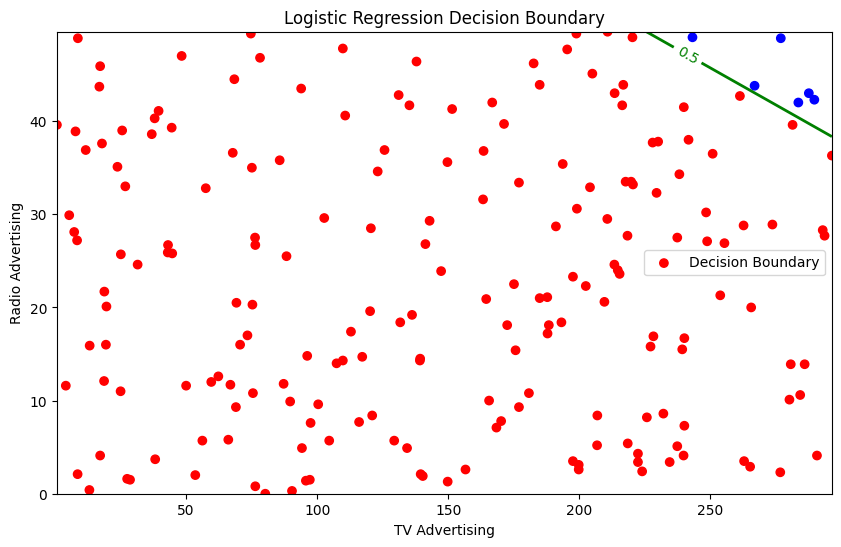

In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

#
# Create a binary target variable: 1 if Sales > 25, else 0
data['HighSales'] = (data['sales'] > 25).astype(int)

# Features and target
X = data[['TV', 'radio']]
y = data['HighSales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Visualize the decision boundary
plt.figure(figsize=(10, 6))

# Scatter plot of the data points
colors = ['red' if label == 0 else 'blue' for label in y]
plt.scatter(data['TV'], data['radio'], c=colors)

# Create a grid of TV and Radio values for decision boundary visualization
tv_range = np.linspace(data['TV'].min(), data['TV'].max(), 100)
radio_range = np.linspace(data['radio'].min(), data['radio'].max(), 100)
tv_grid, radio_grid = np.meshgrid(tv_range, radio_range)

# Flatten the grid and predict probabilities
grid_points = np.c_[tv_grid.ravel(), radio_grid.ravel()]
pred_probs = log_reg.predict_proba(grid_points)[:, 1].reshape(tv_grid.shape)

# Plot the decision boundary at probability threshold of 0.5
contour = plt.contour(tv_grid, radio_grid, pred_probs, levels=[0.5], colors='green', linewidths=2)
plt.clabel(contour, inline=True, fontsize=10)

plt.xlabel('TV Advertising')
plt.ylabel('Radio Advertising')
plt.title('Logistic Regression Decision Boundary')
plt.legend(['Decision Boundary', 'Low Sales (0)', 'High Sales (1)'])
plt.show()
